In [1]:
import tensorflow.keras.utils as utils  # 분류분석시 원핫인코딩 시
from tensorflow.keras.models import Sequential # 모델 생성시 
from tensorflow.keras.layers import Dense, Activation
import numpy as np

- 1. 데이터 확보 및 생성
- 2. 데이터 전처리: 훈련 데이터셋, 검증 데이터셋, 시험 데이터 셋...
- 3. 모델 구성
- 4. 모델 학습과정 (예. 회귀선 출력 100번,1000번)
- 5. 모델 학습 시키기 
- 6. 모델 평가 (시험 데이터 셋으로)
- 7. 모델 사용 (입력값을 주어서 예측값을 받기)


# 1. 데이터 셋 

In [3]:
# 학습데이터 = 훈련 데이터, 검증데이터, 테스트 데이터
X_train = np.array([1,2,3,4,5,6,7,8,9]*10)   #데이터 90개     #입력 값
Y_train = np.array([2,4,6,8,10,12,14,16,18]*10)               #출력 값

# 검증데이터, 테스트 데이터 
X_val = np.array([1,2,3,4,5,6,7,8,9])                #입력 값
Y_val = np.array([2,4,6,8,10,12,14,16,18])           #출력 값

In [4]:
Y_val

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

to_categorical()로 라벨링 처리

In [5]:
# 분류 ( Classification)  90점대, 80점대,70점대 등 
# 분류분석을 하기 위해 target 데이터를 라벨링 전환 (원 핫 인코딩)
Y_train = utils.to_categorical(Y_train,19)
Y_val = utils.to_categorical(Y_val,19)  #여기서 19는 19개의 수 ( 원 핫 인코딩이기에 0,1)를 출력하라  |  대신 합은 1. 따라서 밑에보면 softmax
                                        # 컴퓨터에 입력시 아래 0,1 이렇게 입력하는데, 컴퓨터가 예측 시 0.998 이렇게 나올 수도 

In [6]:
Y_val  # 2번째만 1  , 4번째만 1          위에Y_val 출력결과  array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]], dtype=float32)

# 2. 모델 구성하기 

**Dense(units=  )에 들어갈 숫자를 점점 더 증폭시켜야 accuracy가 높게 나옴.   맨마지막 19개 출력. 앞에 정했음. 그래야 합이1**

In [ ]:
# model함수를 가지고, 층을 쌓아 나간다

In [27]:
model = Sequential()                             
model.add(Dense(units=38,input_dim=1, activation="sigmoid"))   # Softmax, Sigmoid,Relu가 가장 많이 쓰여  
model.add(Dense(units=64, activation="elu"))   #input_dim=38 위에 써서 생략가능     
model.add(Dense(units=32, activation="elu"))  
model.add(Dense(units=19, activation="softmax"))  # softmax: 모든 출력결과의 합이 1 


dense더 늘릴 수 있다. loss가 낮고,accurarcy가 높으면 학습효과가 좋은 것. 

# 3. 모델 학습과정 설정

In [28]:
model.compile(loss="categorical_crossentropy",optimizer="sgd", metrics=['accuracy'])  #여기서 철자 틀리면, 여기서 error안가고 학습할때 error남 

# 4. 모델 학습 시키기

fit()함수 쓰려면 'numpy'여야

In [29]:
 hist = model.fit(X_train, Y_train, epochs=300, batch_size=10, verbose=2, validation_data=(X_val,Y_val))   
    # epochs는 검사 몇번할지 (accuracy)
    # epochs:  the number times that the learning algorithm will work through the entire training dataset. 
    # batch_size=10     10개 읽을때마다 '가중치'를 바꾼다 #loss가 큰지 

Epoch 1/300
9/9 - 1s - loss: 2.9386 - accuracy: 0.1111 - val_loss: 2.9193 - val_accuracy: 0.1111
Epoch 2/300
9/9 - 0s - loss: 2.9104 - accuracy: 0.1111 - val_loss: 2.8912 - val_accuracy: 0.1111
Epoch 3/300
9/9 - 0s - loss: 2.8818 - accuracy: 0.1111 - val_loss: 2.8647 - val_accuracy: 0.1111
Epoch 4/300
9/9 - 0s - loss: 2.8570 - accuracy: 0.1111 - val_loss: 2.8395 - val_accuracy: 0.1111
Epoch 5/300
9/9 - 0s - loss: 2.8330 - accuracy: 0.1111 - val_loss: 2.8154 - val_accuracy: 0.1111
Epoch 6/300
9/9 - 0s - loss: 2.8077 - accuracy: 0.1111 - val_loss: 2.7922 - val_accuracy: 0.1111
Epoch 7/300
9/9 - 0s - loss: 2.7861 - accuracy: 0.1111 - val_loss: 2.7699 - val_accuracy: 0.1111
Epoch 8/300
9/9 - 0s - loss: 2.7631 - accuracy: 0.1111 - val_loss: 2.7484 - val_accuracy: 0.1111
Epoch 9/300
9/9 - 0s - loss: 2.7423 - accuracy: 0.1111 - val_loss: 2.7275 - val_accuracy: 0.1111
Epoch 10/300
9/9 - 0s - loss: 2.7210 - accuracy: 0.1111 - val_loss: 2.7074 - val_accuracy: 0.1111
Epoch 11/300
9/9 - 0s - loss:

Epoch 85/300
9/9 - 0s - loss: 2.2240 - accuracy: 0.0778 - val_loss: 2.2131 - val_accuracy: 0.1111
Epoch 86/300
9/9 - 0s - loss: 2.2256 - accuracy: 0.0556 - val_loss: 2.2123 - val_accuracy: 0.1111
Epoch 87/300
9/9 - 0s - loss: 2.2231 - accuracy: 0.0444 - val_loss: 2.2116 - val_accuracy: 0.1111
Epoch 88/300
9/9 - 0s - loss: 2.2198 - accuracy: 0.0444 - val_loss: 2.2108 - val_accuracy: 0.1111
Epoch 89/300
9/9 - 0s - loss: 2.2220 - accuracy: 0.0222 - val_loss: 2.2101 - val_accuracy: 0.1111
Epoch 90/300
9/9 - 0s - loss: 2.2205 - accuracy: 0.0556 - val_loss: 2.2094 - val_accuracy: 0.1111
Epoch 91/300
9/9 - 0s - loss: 2.2160 - accuracy: 0.0778 - val_loss: 2.2087 - val_accuracy: 0.0000e+00
Epoch 92/300
9/9 - 0s - loss: 2.2164 - accuracy: 0.0778 - val_loss: 2.2080 - val_accuracy: 0.0000e+00
Epoch 93/300
9/9 - 0s - loss: 2.2138 - accuracy: 0.0556 - val_loss: 2.2073 - val_accuracy: 0.1111
Epoch 94/300
9/9 - 0s - loss: 2.2175 - accuracy: 0.0556 - val_loss: 2.2067 - val_accuracy: 0.1111
Epoch 95/300

Epoch 168/300
9/9 - 0s - loss: 2.1855 - accuracy: 0.1778 - val_loss: 2.1730 - val_accuracy: 0.2222
Epoch 169/300
9/9 - 0s - loss: 2.1846 - accuracy: 0.1000 - val_loss: 2.1726 - val_accuracy: 0.2222
Epoch 170/300
9/9 - 0s - loss: 2.1869 - accuracy: 0.0333 - val_loss: 2.1722 - val_accuracy: 0.2222
Epoch 171/300
9/9 - 0s - loss: 2.1852 - accuracy: 0.1444 - val_loss: 2.1717 - val_accuracy: 0.2222
Epoch 172/300
9/9 - 0s - loss: 2.1815 - accuracy: 0.1889 - val_loss: 2.1711 - val_accuracy: 0.2222
Epoch 173/300
9/9 - 0s - loss: 2.1842 - accuracy: 0.1667 - val_loss: 2.1706 - val_accuracy: 0.2222
Epoch 174/300
9/9 - 0s - loss: 2.1827 - accuracy: 0.1667 - val_loss: 2.1701 - val_accuracy: 0.2222
Epoch 175/300
9/9 - 0s - loss: 2.1822 - accuracy: 0.1889 - val_loss: 2.1696 - val_accuracy: 0.2222
Epoch 176/300
9/9 - 0s - loss: 2.1799 - accuracy: 0.1556 - val_loss: 2.1691 - val_accuracy: 0.2222
Epoch 177/300
9/9 - 0s - loss: 2.1802 - accuracy: 0.1889 - val_loss: 2.1686 - val_accuracy: 0.2222
Epoch 178/

Epoch 251/300
9/9 - 0s - loss: 2.1085 - accuracy: 0.2222 - val_loss: 2.0961 - val_accuracy: 0.1111
Epoch 252/300
9/9 - 0s - loss: 2.1082 - accuracy: 0.1778 - val_loss: 2.0942 - val_accuracy: 0.2222
Epoch 253/300
9/9 - 0s - loss: 2.1067 - accuracy: 0.1333 - val_loss: 2.0924 - val_accuracy: 0.2222
Epoch 254/300
9/9 - 0s - loss: 2.1074 - accuracy: 0.1667 - val_loss: 2.0905 - val_accuracy: 0.2222
Epoch 255/300
9/9 - 0s - loss: 2.1020 - accuracy: 0.1778 - val_loss: 2.0886 - val_accuracy: 0.2222
Epoch 256/300
9/9 - 0s - loss: 2.0993 - accuracy: 0.2111 - val_loss: 2.0866 - val_accuracy: 0.2222
Epoch 257/300
9/9 - 0s - loss: 2.0975 - accuracy: 0.1889 - val_loss: 2.0846 - val_accuracy: 0.2222
Epoch 258/300
9/9 - 0s - loss: 2.0948 - accuracy: 0.1889 - val_loss: 2.0825 - val_accuracy: 0.3333
Epoch 259/300
9/9 - 0s - loss: 2.0964 - accuracy: 0.1667 - val_loss: 2.0805 - val_accuracy: 0.2222
Epoch 260/300
9/9 - 0s - loss: 2.0910 - accuracy: 0.1444 - val_loss: 2.0784 - val_accuracy: 0.2222
Epoch 261/

In [12]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 5. 모델 학습과정 살펴보기 (hist, 평가)

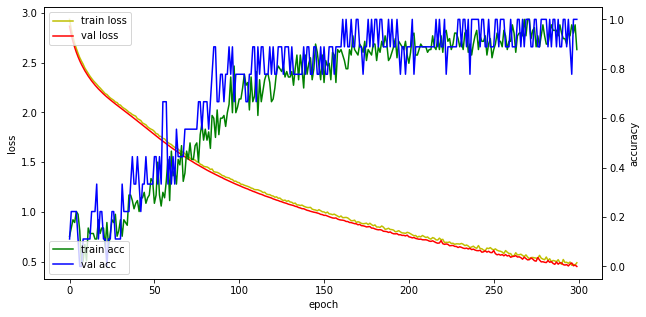

In [20]:
# 모델의 학습과정 표시 하기 
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'],'y',label="train loss")
loss_ax.plot(hist.history['val_loss'],'r', label="val loss")

acc_ax = loss_ax.twinx() #loss_ax와 x축을 공유하는 acc_ax 생성 
acc_ax.plot(hist.history['accuracy'],'g', label="train acc")
acc_ax.plot(hist.history['val_accuracy'],'b', label="val acc")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")
loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

In [ ]:
# loss가 줄어들면 accuracy가 늘었다 줄었다 늘었다 줄었다  ???????  accuracy기준 데이터가 뭔지. meaningless data를 읽어들이면 accuracy가 떨어져서 그런건지?

In [21]:
# 모델 평가
score = model.evaluate(X_val,Y_val,batch_size=1)
score      # X_val,Y_val  9개.    

9/9 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 1.0000


[0.4538668096065521, 1.0]

In [22]:
print('loss:',score[0])
print('accuracy:', score[1])

loss: 0.4538668096065521
accuracy: 1.0


# 6. 모델을 이용해서 예측하기 

In [25]:
model.predict_classes(np.array([2]))  # 맨 위에 '1.데이터셋' 밑에 보면  2를 input하면,  4를output해라라고 설정  ******************

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4], dtype=int64)

검사용 

In [32]:
model.predict(np.array([2])).argmax()   #4가 나와야 

2

In [26]:
model.predict(np.array([2]))    #4일 확률이 제일 높다 (따라서 맞게 출력     2를 input하면,  4를output해라라고 앞에설정 )
#0일 확률: 1.04233901e-14,         1일 확률:7.07105002e-13      2일확률:1.24965616e-01    3일확률: 2.43055901e-12   4일확률:7.44407296e-01 

array([[1.04233901e-14, 7.07105002e-13, 1.24965616e-01, 2.43055901e-12,
        7.44407296e-01, 9.74214875e-11, 1.29376113e-01, 5.11858188e-13,
        1.24766387e-03, 8.10273235e-13, 3.25489623e-06, 1.02750655e-11,
        8.16223089e-10, 8.02966959e-13, 1.20970020e-13, 1.54786045e-11,
        3.45478236e-17, 7.63149174e-14, 6.30585470e-24]], dtype=float32)